In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'goog' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999'# Updated 1/5/21 1D, 3D, 5D ahead
               , 'aapl':'12/12/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'acy': '01/18/1998' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'idex': '05/23/2007' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
              }

In [4]:
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-21,1740.849976,1699.000000,1713.510010,1739.369995,1828400.0,1739.369995,-0.015092,0.024632,0.004830,0.006875,-0.002343,-1
2020-12-22,1737.405029,1712.574951,1734.430054,1723.500000,936700.0,1723.500000,0.006302,0.014499,-0.009124,0.006192,-0.005044,1
2020-12-23,1747.989990,1725.040039,1728.109985,1732.380005,1033800.0,1732.380005,-0.002471,0.013304,0.005152,0.007738,-0.003474,-1
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800.0,1738.849976,-0.002219,0.009768,0.003735,0.007670,-0.001014,1
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000.0,1776.089966,-0.013961,0.025421,0.021416,0.010845,0.005202,-1
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400.0,1758.719971,0.016260,0.020699,-0.009780,0.012768,0.002280,-1
2020-12-30,1765.094971,1725.599976,1762.010010,1739.520020,1306100.0,1739.520020,0.012764,0.022888,-0.010917,0.013186,0.001921,1
2020-12-31,1758.930054,1735.420044,1735.420044,1751.880005,1011900.0,1751.880005,-0.009485,0.013547,0.007105,0.013334,0.002312,-1
2021-01-04,1760.650024,1707.849976,1757.540039,1728.239990,1900500.0,1728.239990,0.016671,0.030916,-0.013494,0.014997,-0.001134,1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

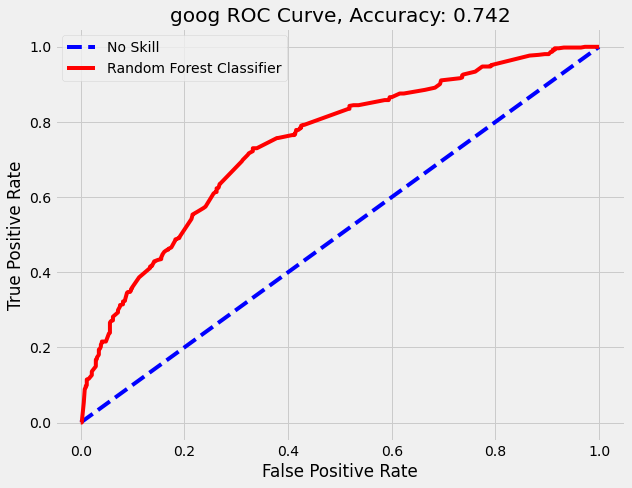

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

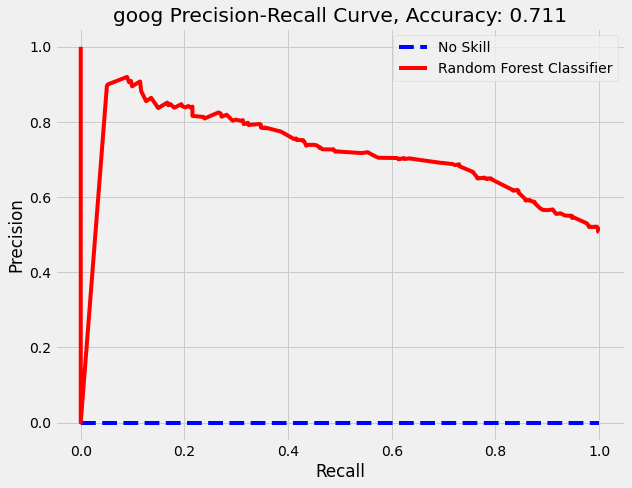

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

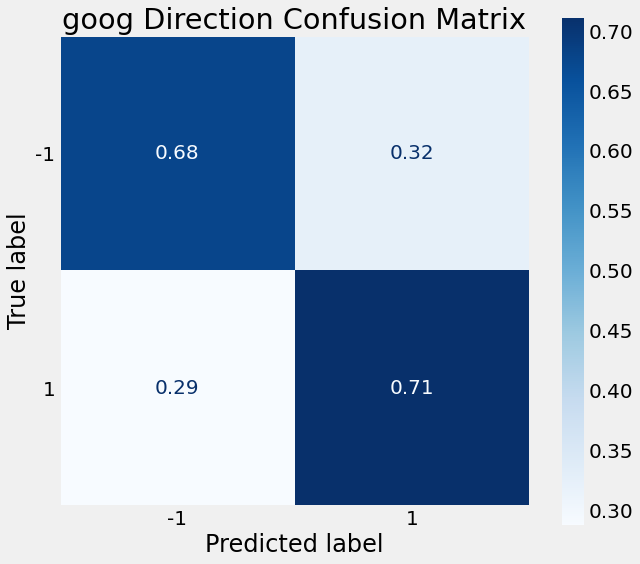

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.7064761292453609'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High            1744.500000
Low             1718.015015
Open            1757.540039
Close           1740.920044
Volume        901513.000000
Adj Close       1740.920044
oc                 0.009456
hl                 0.015416
adj                0.007337
5stdev_adj         0.010286
5sma_adj          -0.003950
direction         -1.000000
Name: 2021-01-05 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-days_back]
last

oc            0.018039
hl            0.027723
5stdev_adj    0.024756
5sma_adj     -0.003772
Name: 2004-08-27 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    4119.000000
mean        0.001032
std         0.019213
min        -0.116091
25%        -0.007397
50%         0.000686
75%         0.009952
max         0.199915
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name} {days_ahead} day(s) ahead')
else:
    print(f'Sell or hold {stock_name} {days_ahead} day(s) ahead')

Buy goog 1 day(s) ahead


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400.0,1758.719971,0.016260,0.020699,-0.009780,0.012768,0.002280,-1,1,-0.010917
2020-12-30,1765.094971,1725.599976,1762.010010,1739.520020,1306100.0,1739.520020,0.012764,0.022888,-0.010917,0.013186,0.001921,1,1,0.007105
2020-12-31,1758.930054,1735.420044,1735.420044,1751.880005,1011900.0,1751.880005,-0.009485,0.013547,0.007105,0.013334,0.002312,-1,-1,0.013494
2021-01-04,1760.650024,1707.849976,1757.540039,1728.239990,1900500.0,1728.239990,0.016671,0.030916,-0.013494,0.014997,-0.001134,1,1,0.007337
2021-01-05,1744.500000,1718.015015,1757.540039,1740.920044,901513.0,1740.920044,0.009456,0.015416,0.007337,0.010286,-0.003950,-1,1,0.000686


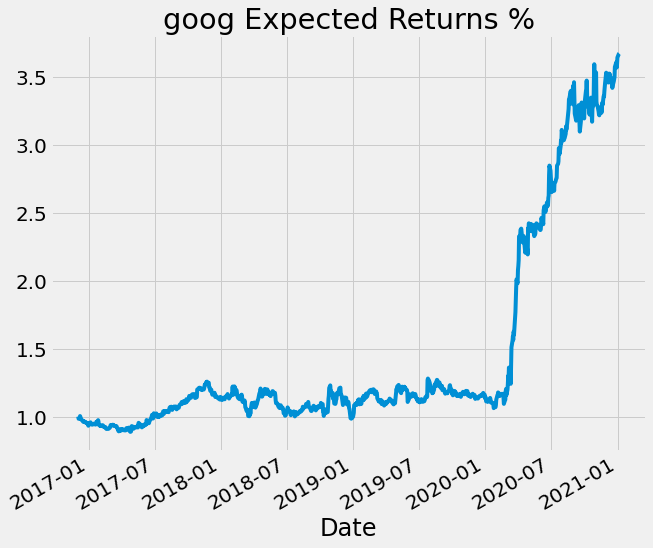

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

3.1515933426225406

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) / stock_df['Close'][-test_idx]

8.17294221323756

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/

### Training

In [22]:
# this takes a while, 10.5+ hours!
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

### Recording Results